# Несбалансированные выборки. Практическая работа

## Цель практической работы

Научиться обрабатывать несбалансированные данные и обучать модели машинного обучения на таких данных.

## Что входит в работу


1. Загрузить данные и провести разведочный анализ.
2. Разделить данные на обучающую и тестовую выборки.
3. Подготовить данные для моделирования.
4. Сбалансировать данные методом SMOTE и обучить модель машинного обучения.
5. Обучить модель машинного обучения с использованием весов классов и кросс-валидации.
6. Сравнить метрики качества четырёх моделей.




## Что оценивается 

- Выполнены все этапы работы.
- Не допущена утечка данных при разделении выборок и подготовке данных.
- Данные корректным образом сбалансированы.
- Модели не переобучены.


## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.


# Задача

Пусть у нас имеется некоторый набор данных `german_credit_data.csv` о заёмщиках банка:

* Age — возраст заёмщика.
* Sex — пол заёмщика.
* Job — тип работы заёмщика.
* Housing — тип жилья заёмщика.
* Saving accounts — объём средств на сберегательных счетах заёмщика.
* Checking account — объём средств на основном счёте заёмщика.
* Credit amount — размер кредита. 
* Duration — срок кредита (в месяцах).
* Purpose — цель кредита.
* Risk — таргет, допустил ли заёмщик просрочку платежей по кредиту.

Решите задачу классификации заёмщиков, чтобы банк умел заранее предсказывать просрочку платежей по кредиту. 



# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:

data = pd.read_csv("german_credit_data.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.3+ KB


In [6]:
data.isna().sum() /data.shape[0] * 100

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64

In [7]:
data['Checking account'].value_counts(dropna=False)

Checking account
NaN         394
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [84]:
data.isna().sum() /data.shape[0] * 100


Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64

In [32]:
numerical_columns = data.select_dtypes(include=["int", 'float']).columns
categorical_columns = data.drop('Risk', axis=1).select_dtypes(include=['O'])
target = 'Risk'

## Numerical columns

In [86]:
data[numerical_columns].describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [87]:
def plot_numeric_cols(df, numeric_cols):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    sns.boxplot(data=df[numeric_cols], ax=axs[0, 0])
    axs[0, 0].set_title("Box Plot of Numeric Columns")

    sns.histplot(data=df[numeric_cols], kde=True, ax=axs[0, 1])
    axs[0, 1].set_title("Histogram of Numeric Columns")

    sns.violinplot(data=df[numeric_cols], ax=axs[1, 0])
    axs[1, 0].set_title("Violin Plot of Numeric Columns")

    sns.kdeplot(data=df[numeric_cols], ax=axs[1, 1])
    axs[1, 1].set_title("Kernel Density Plot of Numeric Columns")

    plt.tight_layout()
    plt.show()

c:\Users\Danil\.conda\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Danil\.conda\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


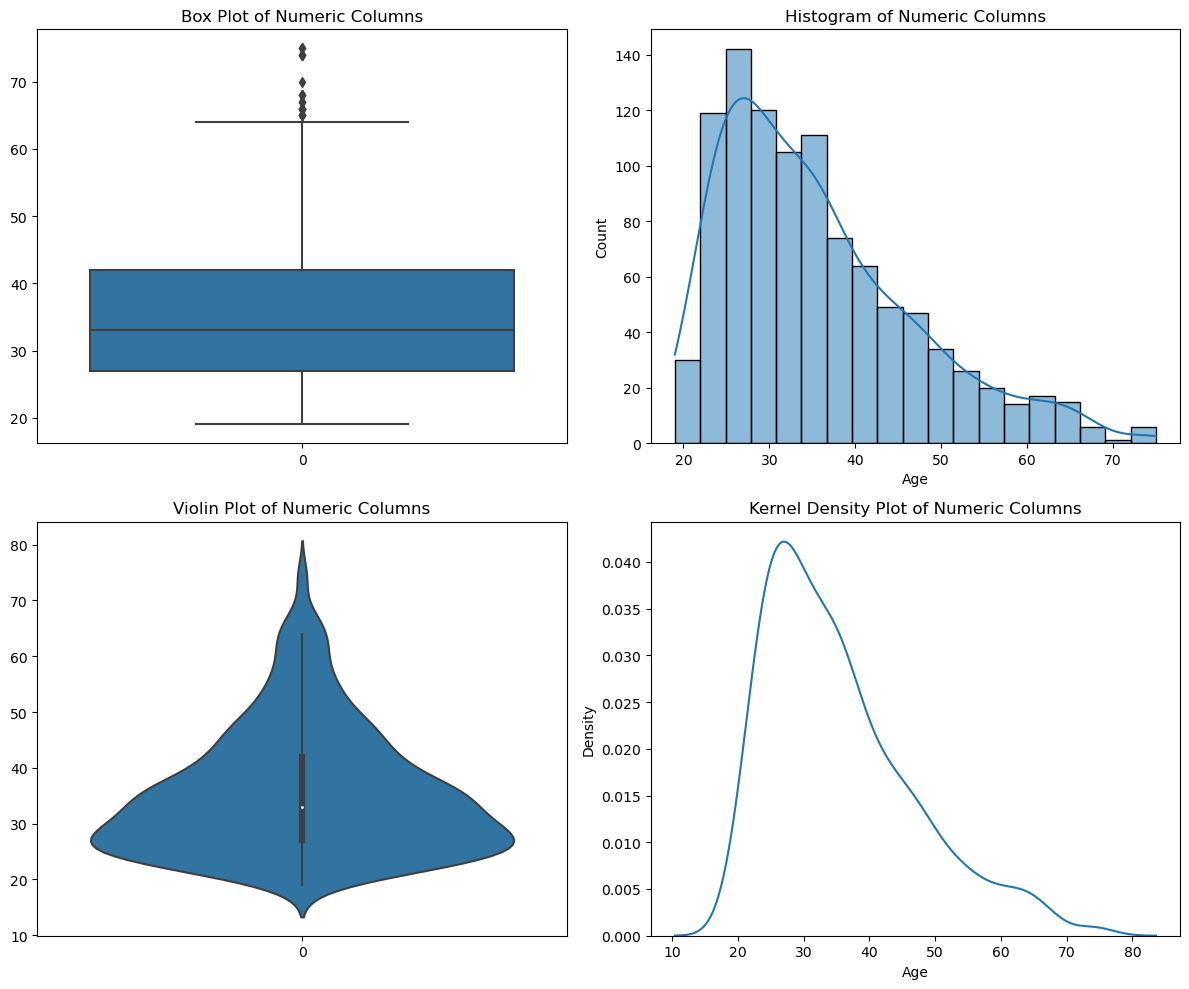

In [88]:
plot_numeric_cols(data, numerical_columns[0])

c:\Users\Danil\.conda\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Danil\.conda\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


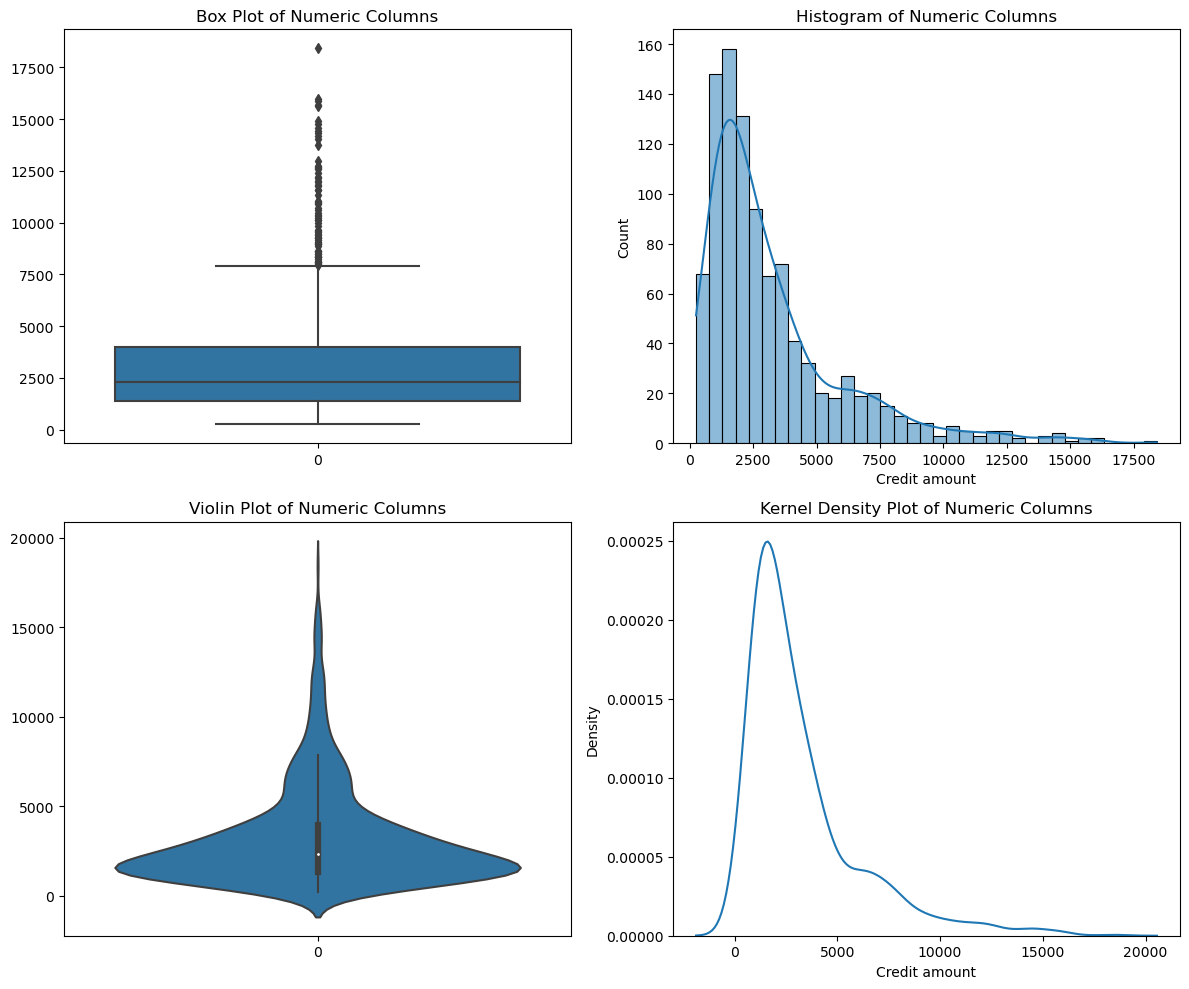

In [89]:
plot_numeric_cols(data, numerical_columns[1])


c:\Users\Danil\.conda\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Danil\.conda\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


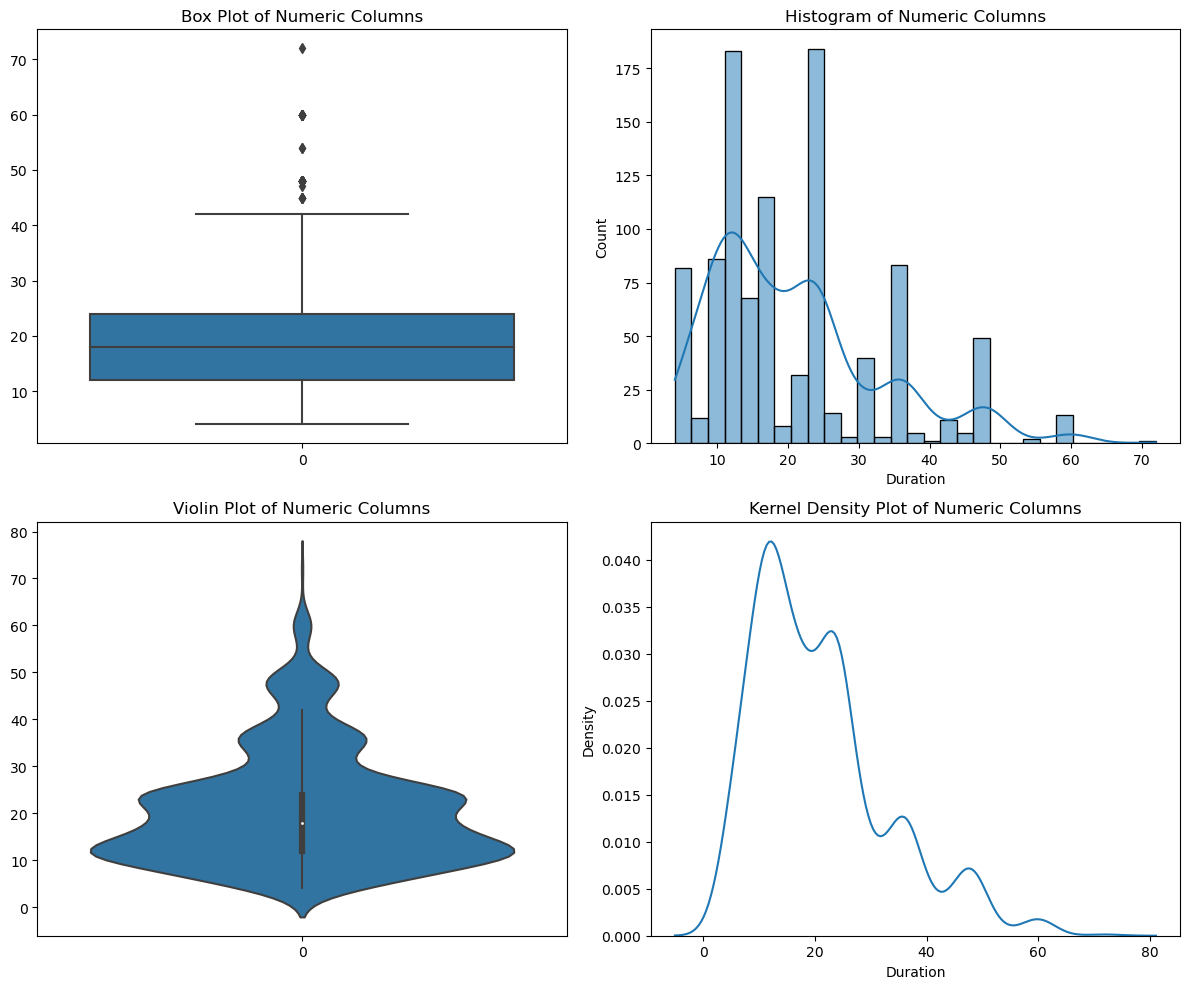

In [90]:
plot_numeric_cols(data, numerical_columns[2])


## Categorical columns


In [91]:
def analyze_categorical_cols(df, categorical_cols):
    for col in categorical_cols:
        print(f"Unique values in column {col}: {df[col].nunique()}")
        print(f"Value counts in column {col}:")
        print(df[col].value_counts())
        print()

    for i, col in enumerate(categorical_cols):
        plt.figure(figsize=(12, 8))
        sns.countplot(x=col, data=df)
        plt.title(f"Count Plot of {col}")
        plt.show()
    #plt.tight_layout()
    #plt.show()

Unique values in column Sex: 2
Value counts in column Sex:
Sex
male      690
female    310
Name: count, dtype: int64

Unique values in column Job: 4
Value counts in column Job:
Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64

Unique values in column Housing: 3
Value counts in column Housing:
Housing
own     713
rent    179
free    108
Name: count, dtype: int64

Unique values in column Saving accounts: 4
Value counts in column Saving accounts:
Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

Unique values in column Checking account: 3
Value counts in column Checking account:
Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

Unique values in column Purpose: 8
Value counts in column Purpose:
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domest

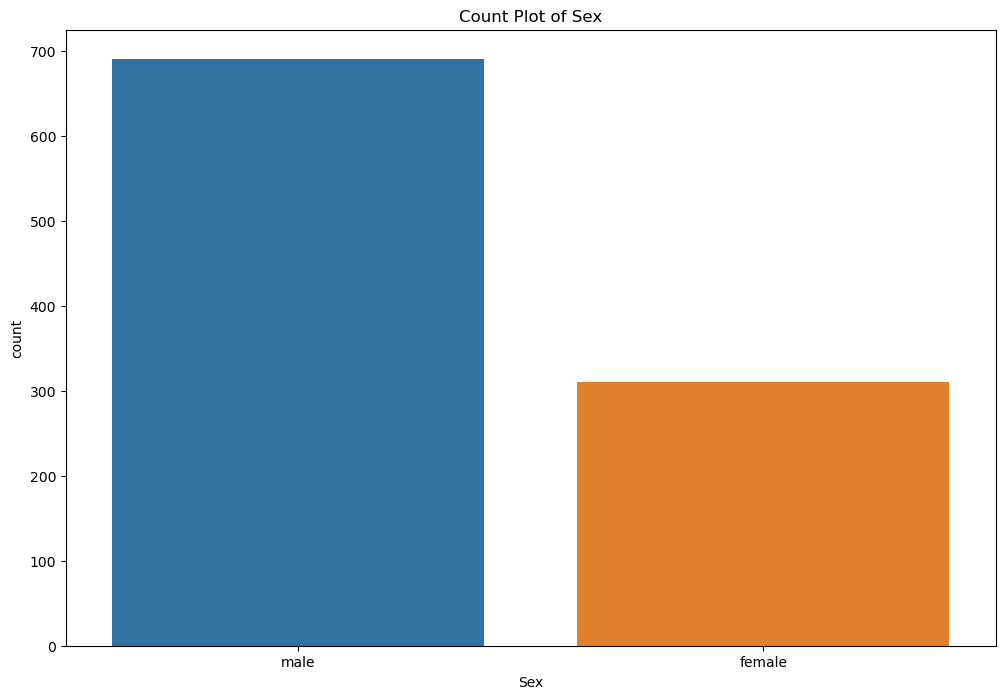

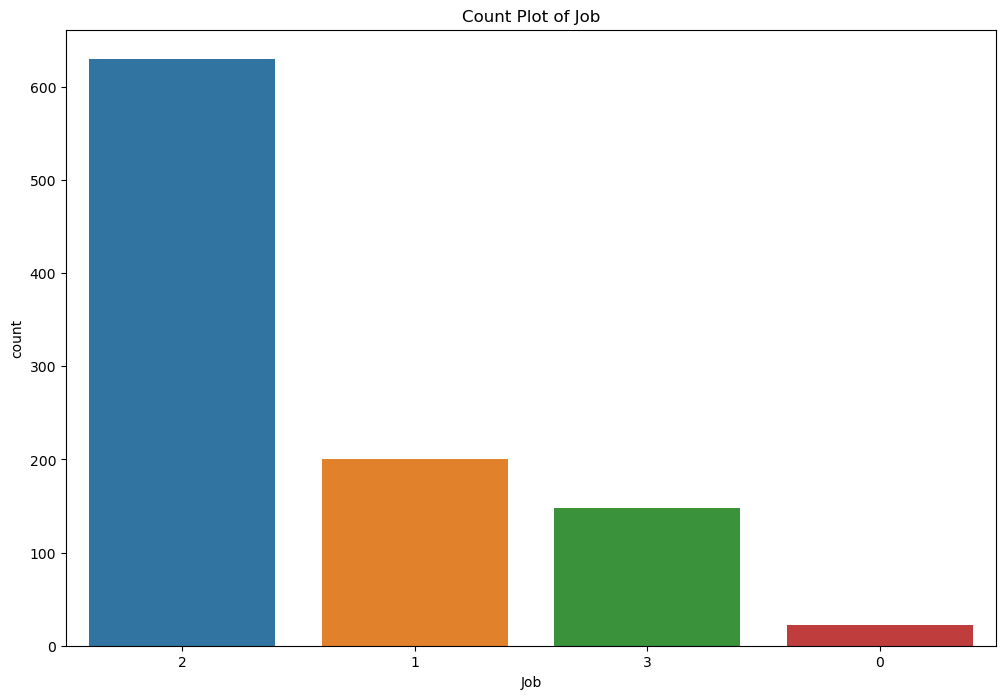

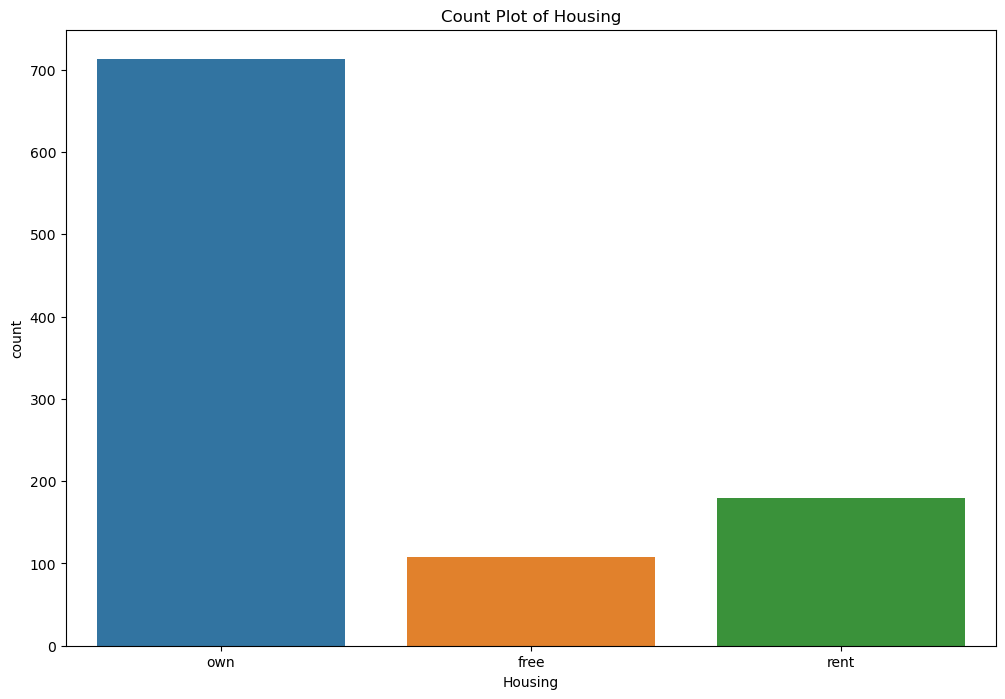

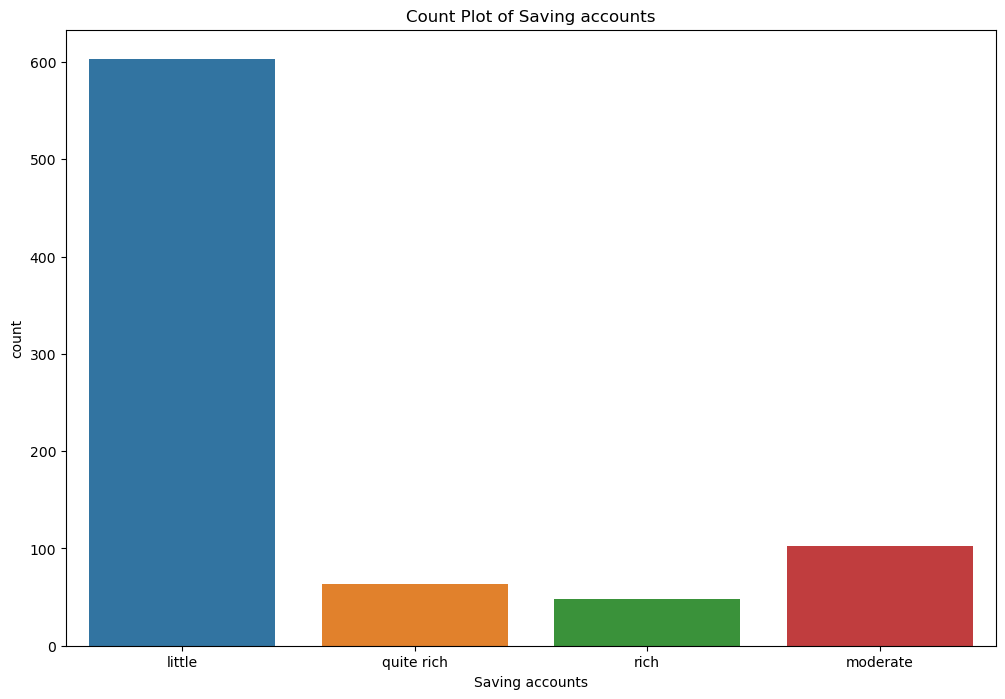

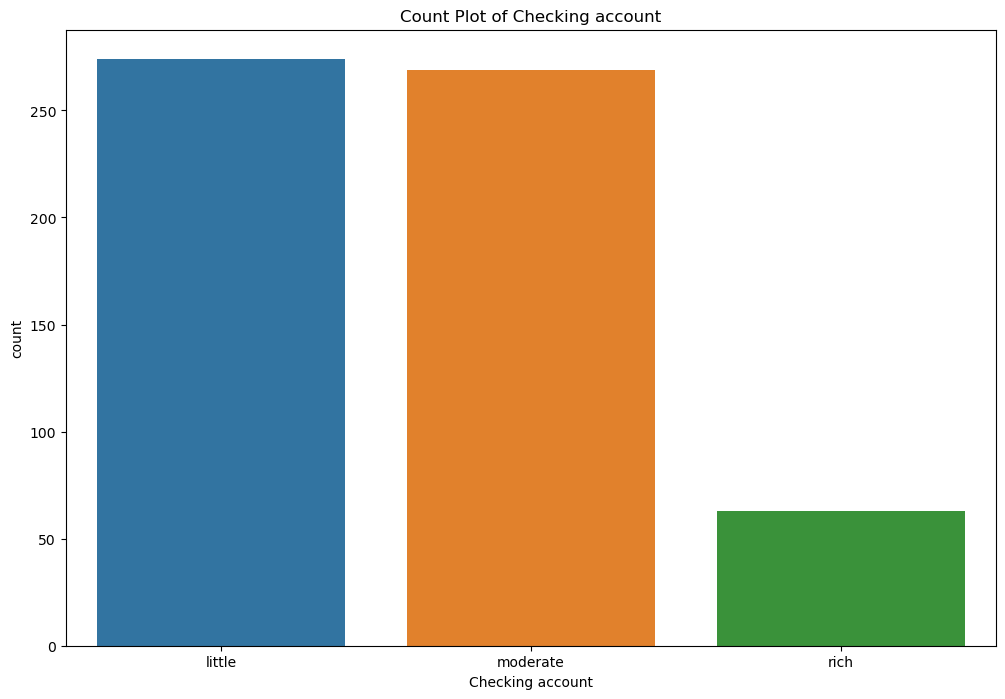

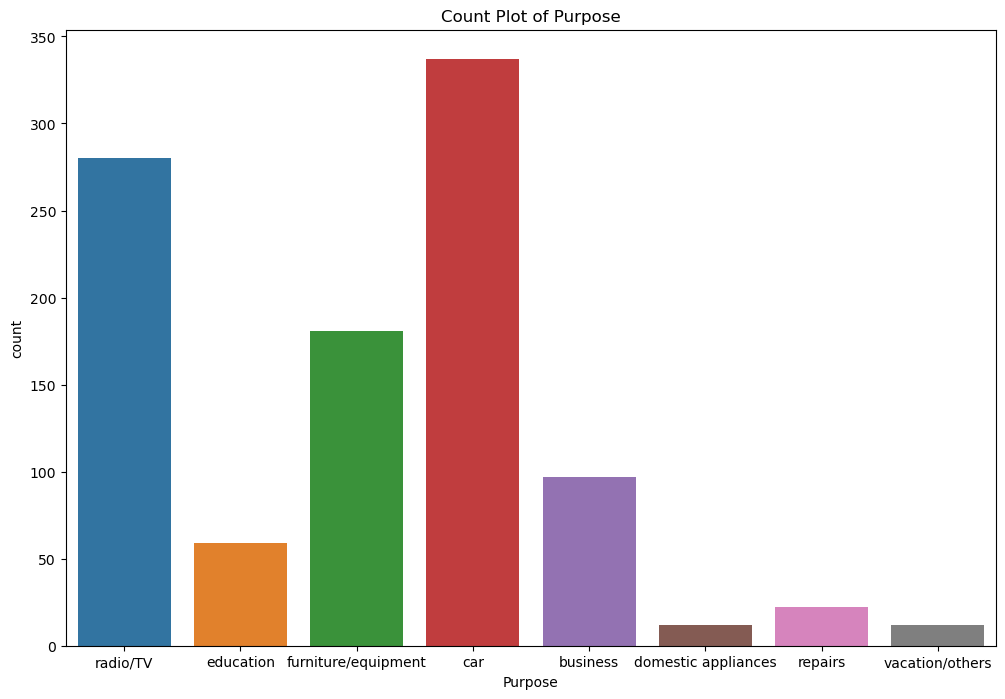

In [92]:
analyze_categorical_cols(data, categorical_columns)

# Задание 2

Разделите датасет на обучающую и тестовую выборки в пропорции 80:20. Разделение должно быть стратифицированным по таргету Risk.

В этом и следующих заданиях используйте random_state = 1.

In [33]:
from sklearn.model_selection import train_test_split

data['Checking account'] = data['Checking account'].fillna("Unknown")
data['Saving accounts'] = data['Saving accounts'].fillna("Unknown")


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(target, axis=1), data[target], train_size=0.8, random_state=1, stratify=data[target])

# Задание 3

Проведите этап очистки и подготовки данных (data preparation) и подготовьте данные к моделированию.

In [21]:
data['Checking account'] = data['Checking account'].fillna("Unknown")
data['Saving accounts'] = data['Saving accounts'].fillna("Unknown")


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [23]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,Unknown,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [34]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = data.drop(target, axis=1).select_dtypes(include=['object']).columns

# Create OneHotEncoder instance
ohe = OneHotEncoder(sparse_output=False)

# Fit and transform categorical columns
data_ohe = ohe.fit_transform(data[categorical_cols])

# Convert to dataframe
data_ohe = pd.DataFrame(data_ohe, columns=ohe.get_feature_names_out())

# Concatenate with original dataframe
data = pd.concat([data, data_ohe], axis=1)

# Drop original categorical columns
data = data.drop(categorical_cols, axis=1)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(target, axis=1), data[target], train_size=0.8, random_state=1, stratify=data[target])


# Задание 4

Сбалансируйте обучающую выборку методом SMOTE и обучите модель RandomForestClassifier. Подберите оптимальные гиперпараметры с помощью GridSearch. Посчитайте метрику ROC-AUC на тестовой выборке.

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Предположим, что X_train, y_train, X_test и y_test - это ваши обучающие и тестовые наборы данных

# Балансировка обучающей выборки с помощью SMOTE
smote = SMOTE(random_state=1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Определение сетки гиперпараметров для RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Выполнение поиска по сетке для нахождения оптимальных гиперпараметров
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_balanced, y_train_balanced)

# Обучение лучшей модели на балансированной обучающей выборке
best_model = grid_search.best_estimator_
best_model.fit(X_train_balanced, y_train_balanced)

# Оценка модели на тестовой выборке
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Лучшие гиперпараметры: {grid_search.best_params_}")
print(f"ROC-AUC на тестовой выборке: {roc_auc:.4f}")

Лучшие гиперпараметры: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
ROC-AUC на тестовой выборке: 0.7776


# Задание 5

Обучите модель RandomForestClassifier с использованием весов классов. Подберите оптимальные веса и гиперпараметры с помощью GridSearch. Посчитайте метрику ROC-AUC на тестовой выборке.

In [54]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
# Разделить данные на обучающую и тестовую выборки

# Вычислить веса классов
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
w0, w1 = class_weights[0], class_weights[1]

# Определить сетку гиперпараметров
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'class_weight': [
        
        'balanced'  
    ]
}

rfc = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(rfc, param_grid, cv=2, scoring='roc_auc')

grid_search.fit(X_train, y_train)

print("Лучшие гиперпараметры:", grid_search.best_params_)
print("Лучшая оценка:", grid_search.best_score_)

y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Тест ROC-AUC:", roc_auc)


Лучшие гиперпараметры: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 500}
Лучшая оценка: 0.746860119047619
Тест ROC-AUC: 0.7835714285714286
